# **Women’s Representation in Global STEM Education**

Predict the future Female Graduation Rate (%) in STEM for a given country and year using factors like enrollment, field of study, and gender gap index.



In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from google.colab import drive
drive.mount('/content/drive')
import os
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
#load data
data = pd.read_csv('/content/drive/MyDrive/Joy/women_in_stem.csv')
data.head(10)


,Country,Year,Female Enrollment (%),Female Graduation Rate (%),STEM Fields,Gender Gap Index
0,China,2018,20.4,43.2,Engineering,0.52
1,China,2005,35.6,29.3,Mathematics,0.98
2,China,2005,53.7,32.4,Biology,0.60
3,Germany,2007,65.0,63.6,Mathematics,0.69
4,Canada,2010,54.4,28.8,Engineering,0.74
5,India,2001,53.0,54.5,Computer Science,0.54
6,Canada,2002,69.0,23.2,Engineering,0.86
7,India,2000,29.5,38.1,Engineering,0.90
8,USA,2014,57.1,35.7,Biology,0.61
9,China,2020,36.7,64.3,Computer Science,0.96


In [3]:
# Check for data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     500 non-null    object 
 1   Year                        500 non-null    int64  
 2   Female Enrollment (%)       500 non-null    float64
 3   Female Graduation Rate (%)  500 non-null    float64
 4   STEM Fields                 500 non-null    object 
 5   Gender Gap Index            500 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 23.6+ KB
None


In [4]:
# Check for missing values
missing_values = data.isnull().sum()

# Print only columns with missing values
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
Series([], dtype: int64)


In [5]:
#Check for outliers


In [6]:
# Print unique country names
print("Unique Countries:")
print(data['Country'].unique())

print("\nNumber of Countries:", data['Country'].nunique())


Unique Countries:
['China' 'Germany' 'Canada' 'India' 'USA' 'Australia']

Number of Countries: 6


In [7]:
# Print unique STEM Fields or Subjects
print("\nUnique STEM Fields:")
print(data['STEM Fields'].unique())

print("\nNumber of STEM Fields:", data['STEM Fields'].nunique())


Unique STEM Fields:
['Engineering' 'Mathematics' 'Biology' 'Computer Science']

Number of STEM Fields: 4


In [8]:
# Set style for all plots
sns.set_style("whitegrid")
palette = sns.light_palette("seagreen", as_cmap=False, n_colors=4)

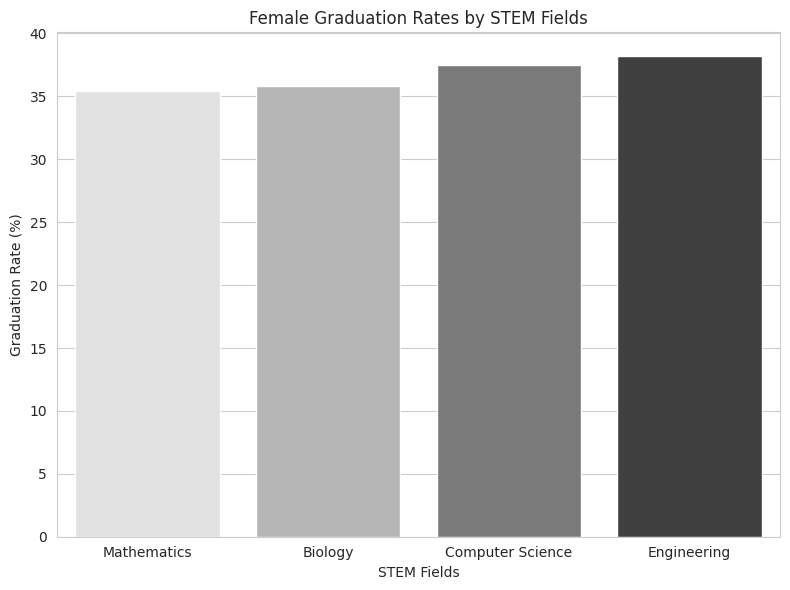

In [9]:
# Group and sort by average graduation rate
data_grouped = data.groupby('STEM Fields')['Female Graduation Rate (%)'].mean().sort_values().reset_index()

# Set grayscale style
sns.set_style("whitegrid")
gray_palette = sns.color_palette("Greys", n_colors=len(data_grouped))

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    data=data_grouped,
    x="STEM Fields",
    y="Female Graduation Rate (%)",
    palette=gray_palette
)
plt.title("Female Graduation Rates by STEM Fields")
plt.xlabel("STEM Fields")
plt.ylabel("Graduation Rate (%)")
plt.tight_layout()
plt.show()


The bar chart visualizes the average female graduation rates across different STEM fields. It shows that Engineering generally has the highest average female graduation rate, followed by Computer Science, Biology, and Mathematics. This suggests that while there are variations, female representation in graduation rates is relatively consistent across these STEM disciplines in the dataset.

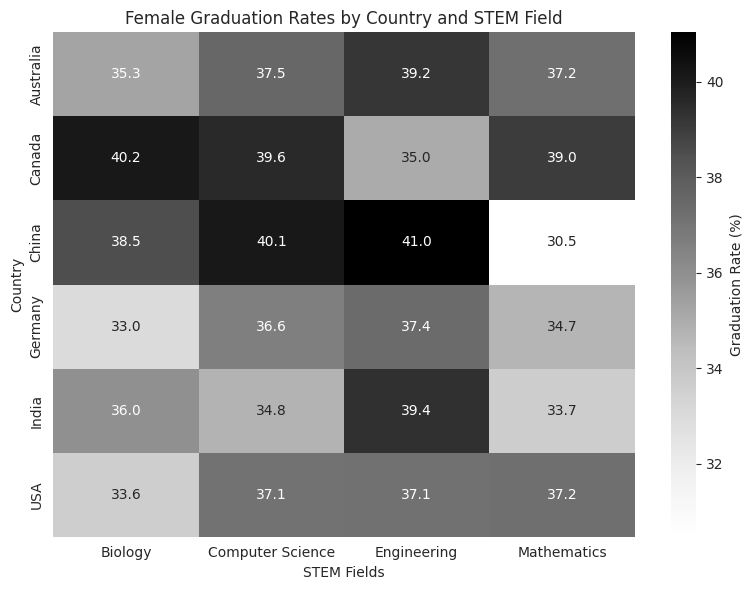

In [10]:
# Female Graduation Rate by Country and STEM Fields
plt.figure(figsize=(8, 6))
pivot_table = data.pivot_table(values="Female Graduation Rate (%)", index="Country", columns="STEM Fields", aggfunc="mean")
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="Greys", cbar_kws={'label': 'Graduation Rate (%)'})
plt.title("Female Graduation Rates by Country and STEM Field")
plt.xlabel("STEM Fields")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


The heatmap visualizes the female graduation rates by country and STEM field, allowing for a comparison of performance across different combinations.

<Figure size 800x600 with 0 Axes>

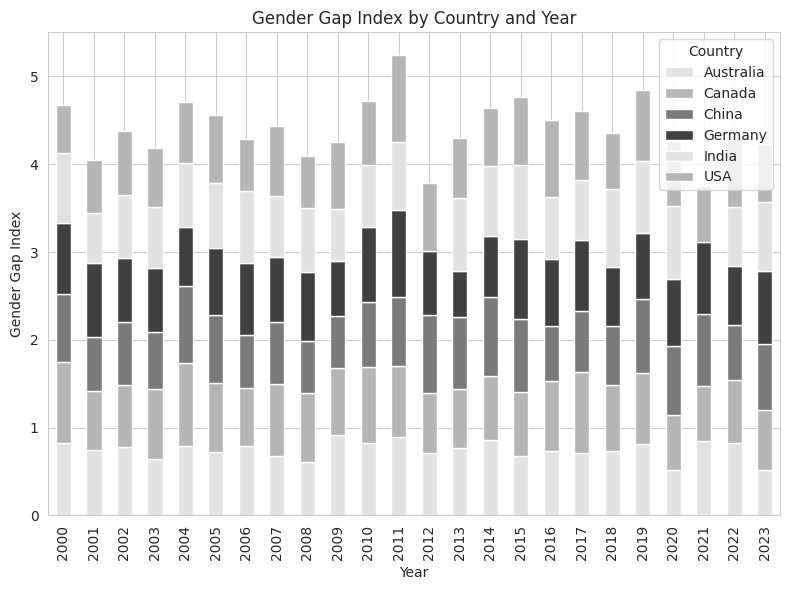

In [11]:
#Gender Gap Index over Year by Country
plt.figure(figsize=(8, 6))
pivot_table = data.pivot_table(values="Gender Gap Index", index="Year", columns="Country", aggfunc="mean")
pivot_table.plot(kind="bar", stacked=True, color=gray_palette, figsize=(8, 6))
plt.title("Gender Gap Index by Country and Year")
plt.xlabel("Year")
plt.ylabel("Gender Gap Index")
plt.tight_layout()
plt.show()

Gender Gap Index has changed over time for each country. A lower Gender Gap Index generally indicates greater gender equality.

# Feature Engineering

In [12]:
#Label Encoding for Country and STEM Fields
le_country = LabelEncoder()
data['Country_encoded'] = le_country.fit_transform(data['Country'])

le_field = LabelEncoder()
data['STEM_field_encoded'] = le_field.fit_transform(data['STEM Fields'])


In [13]:
print("\nSample of Encoded Data:")
print(data[['Country', 'Country_encoded', 'STEM Fields', 'STEM_field_encoded']].head())


Sample of Encoded Data:
   Country  Country_encoded  STEM Fields  STEM_field_encoded
0    China                2  Engineering                   2
1    China                2  Mathematics                   3
2    China                2      Biology                   0
3  Germany                3  Mathematics                   3
4   Canada                1  Engineering                   2


In [14]:
# Feature Selection
features = ['Year', 'Female Enrollment (%)', 'Gender Gap Index', 'Country_encoded', 'STEM_field_encoded']
target = 'Female Graduation Rate (%)'

X = data[features]
y = data[target]


In [15]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Models

Linear Regression

In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R²:", r2_lr)


Linear Regression MSE: 265.9054849984583
Linear Regression R²: -0.022123654216720468


In [18]:
#Initialize and Train SGDRegressor (Gradient Descent)
sgd_model = SGDRegressor(max_iter=1,
                   tol=None,
                   penalty=None,
                   learning_rate='constant',
                   eta0=0.01,
                   warm_start=True,
                   random_state=42)

n_epochs = 100
train_loss = []
test_loss = []

for epoch in range(n_epochs):
    sgd_model.fit(X_train_scaled, y_train)
    # Predict and calculate loss
    y_train_pred = sgd_model.predict(X_train_scaled)
    y_test_pred = sgd_model.predict(X_test_scaled)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_loss.append(train_mse)
    test_loss.append(test_mse)


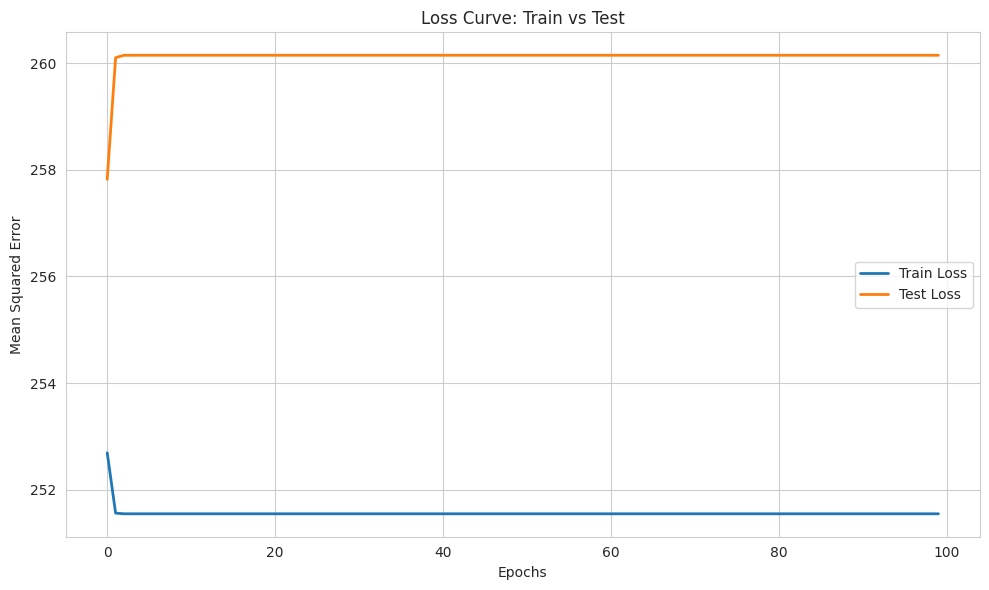

In [19]:
#Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(n_epochs), train_loss, label='Train Loss', linewidth=2)
plt.plot(range(n_epochs), test_loss, label='Test Loss', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Loss Curve: Train vs Test")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [20]:
#Evaluate Model
y_pred = sgd_model.predict(X_test_scaled)

mse_sgd = mean_squared_error(y_test, y_pred)
r2_sgd = r2_score(y_test, y_pred)

print("SGDR Mean Squared Error:", mse_sgd)
print("SGDR R²:", r2_sgd)

SGDR Mean Squared Error: 260.1490737839565
SGDR R²: 3.6218181262981375e-06


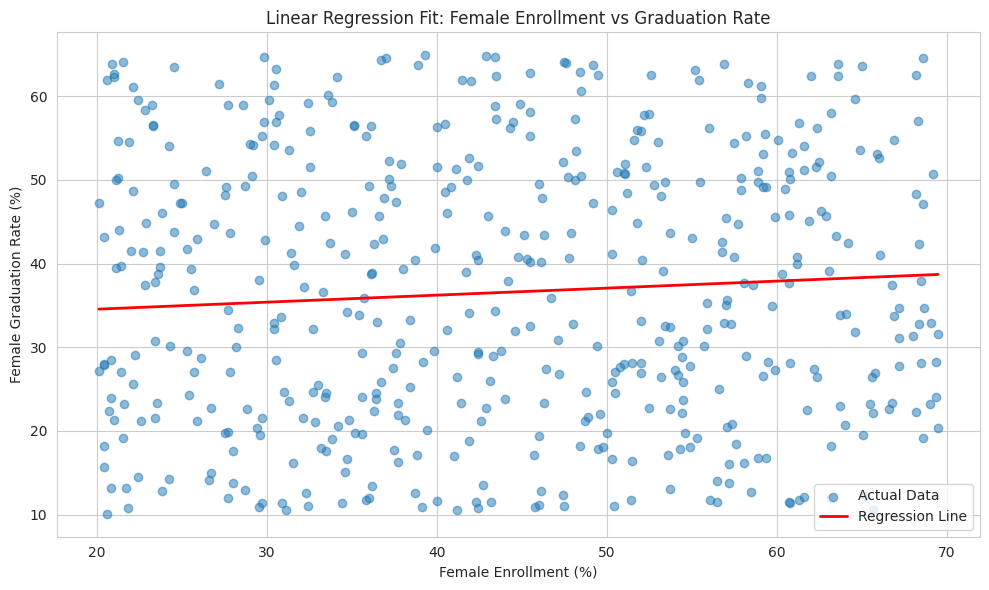

In [21]:
# Feature index for 'Female Enrollment (%)'
feature_name = 'Female Enrollment (%)'
feature_index = X.columns.get_loc(feature_name)

# Generate values for the x-axis (Female Enrollment)
X_plot = np.linspace(X[feature_name].min(), X[feature_name].max(), 100).reshape(-1, 1)

# Create a full feature set where all other features are held constant (mean)
X_fixed = np.tile(X.mean().values, (100, 1))
X_fixed[:, feature_index] = X_plot.flatten()

# Scale it like the training data
X_fixed_scaled = scaler.transform(X_fixed)

# Predict graduation rate using trained model
y_pred_line = sgd_model.predict(X_fixed_scaled)

# Plot actual data (before)
plt.figure(figsize=(10, 6))
plt.scatter(X[feature_name], y, alpha=0.5, label='Actual Data')

# Plot regression line (after)
plt.plot(X_plot, y_pred_line, color='red', label='Regression Line', linewidth=2)

plt.xlabel("Female Enrollment (%)")
plt.ylabel("Female Graduation Rate (%)")
plt.title("Linear Regression Fit: Female Enrollment vs Graduation Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Decision Tree

In [22]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree MSE:", mse_dt)
print("Decision Tree R²:", r2_dt)


Decision Tree MSE: 584.742
Decision Tree R²: -1.2477107977575521


Random Forest

In [23]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)
print("Random Forest R²:", r2_rf)


Random Forest MSE: 286.92879357999993
Random Forest R²: -0.10293590595051083


In [24]:
# Create results table
results = pd.DataFrame({
    "Model": ["Linear Regression (SGD)", "Decision Tree", "Random Forest"],
    "MSE": [mse_sgd, mse_dt, mse_rf],
    "R² Score": [r2_sgd, r2_dt, r2_rf]
})

results


,Model,MSE,R² Score
0,Linear Regression (SGD),260.149074,0.000004
1,Decision Tree,584.742000,-1.247711
2,Random Forest,286.928794,-0.102936


In [25]:
# Identify best model
best_index = results["R² Score"].idxmax()
best_model_name = results.loc[best_index, "Model"]
best_model = [sgd_model, dt_model, rf_model][best_index]

# Save model to file
joblib.dump(best_model, "best_model.pkl")

print(f"Best model '{best_model_name}' saved as 'best_model.pkl'")


Best model 'Linear Regression (SGD)' saved as 'best_model.pkl'


Prediction Example

In [26]:
# Load the saved best model
model = joblib.load("best_model.pkl")

In [27]:
print(len(X_test))

100


In [31]:
# Select a sample from test data
sample_index = 0
sample = X_test_scaled[sample_index].reshape(1, -1)

# Make prediction
prediction = model.predict(sample)[0]
actual = y_test.iloc[sample_index]
deviation = abs(actual - prediction)

# Print results
print(f"Prediction for test sample {sample_index}: {prediction:.2f}%")
print(f"Actual value: {actual:.2f}%")
print(f"Deviation: {deviation:.2f} percentage points")

Prediction for test sample 0: 37.11%
Actual value: 28.00%
Deviation: 9.11 percentage points
